# Examples of Nice Plots

These are examples of plots from the DataQuest course. They demonstrate some design principles.

## FiveThirtyEight Style Bar Plot

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from pathlib import Path

In [2]:
data_path = Path.home() / "datasets" / "tabular_practice"

red_wine = pd.read_csv(data_path / "winequality-red.csv", sep=';')
red_corr = red_wine.corr()['quality'][:-1]
white_wine = pd.read_csv(data_path / "winequality-white.csv", sep=';')
white_corr = white_wine.corr()['quality'][:-1]

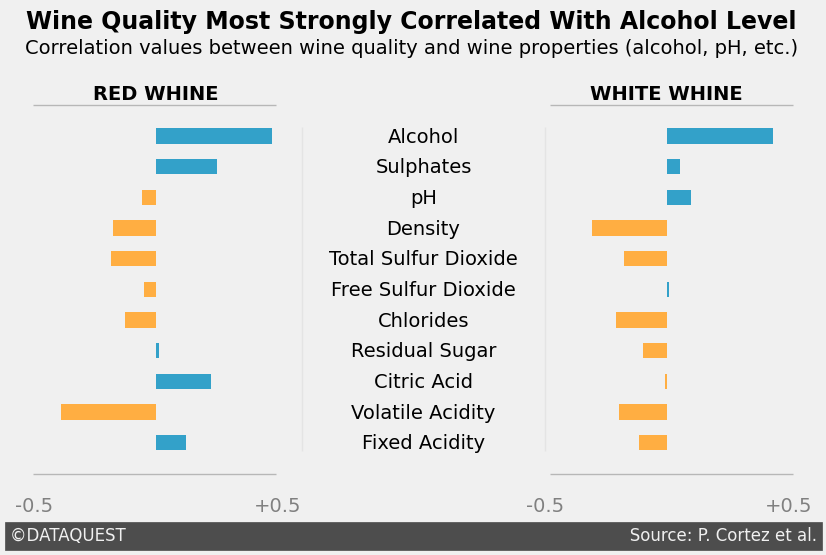

In [43]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))

# * `left=...` in `ax.barh` moves the horizontal center of the bar plots from 0 to `white_offset` or `red_offset`.
#   This way, the two plots are separated.
# * We color positive value bars in blue, negative value bars in orange
white_offset = 2
red_offset = -0.1
positive_color = "#33A1C9"
negative_color = "#ffae42"
ax.barh(
    white_corr.index,
    white_corr,
    color=[positive_color if x >= 0 else negative_color for x in white_corr],
    left=white_offset,
    height=0.5,
)
ax.barh(
    red_corr.index,
    red_corr,
    color=[positive_color if x >= 0 else negative_color for x in red_corr],
    left=red_offset,
    height=0.5,
)

ax.grid(visible=False)

# We show the column names in the center part, between the two plots (centered at x=1). `ha="center"` makes sure
# they are aligned at the center. Also, we capitalize each word, except for "pH".
def capitalize_words(name):
    if name == "pH":
        return "pH"
    else:
        return " ".join(word.capitalize() for word in name.split())

columns = [capitalize_words(name) for name in white_corr.index]
for i, name in enumerate(columns):
    ax.text(1, i - 0.2, name, ha="center")

ax.axvline(x=0.5, ymin=0.1, ymax=0.9, color="grey", alpha=0.1, linewidth=1)
ax.axvline(x=1.5, ymin=0.1, ymax=0.9, color="grey", alpha=0.1, linewidth=1)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5, xmin=0.01, xmax=0.32)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5, xmin=0.67, xmax=0.98)
ax.axhline(11, color='grey', linewidth=1, alpha=0.5, xmin=0.01, xmax=0.32)
ax.axhline(11, color='grey', linewidth=1, alpha=0.5, xmin=0.67, xmax=0.98)
ax.text(red_offset, 11.2, "RED WHINE", weight="bold", ha="center")
ax.text(white_offset, 11.2, "WHITE WHINE", weight="bold", ha="center")

ax.set_xticks([-0.5 + red_offset, 0.5 + red_offset, -0.5 + white_offset, 0.5 + white_offset])
ax.set_xticklabels(["-0.5", "+0.5", "-0.5", "+0.5"], color="grey")
ax.set_yticklabels([])
# ax.tick_params(axis="x", pad=-0.5)

# Signature bar
ax.text(-0.7, -3.2,
        '©DATAQUEST' + ' ' * 96 + 'Source: P. Cortez et al.',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        size=12)

# Title and subtitle
ax.text(1 + 0.5 * red_offset, 13.5, "Wine Quality Most Strongly Correlated With Alcohol Level",
        ha="center", weight="bold", size=17)
ax.text(1 + 0.5 * red_offset, 12.7, "Correlation values between wine quality and wine properties (alcohol, pH, etc.)",
        ha="center")

plt.show()